In [1]:
from person_detect import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
im = cv2.imread('../../../insta/16765.jpg')

In [5]:
def show_cv_image(im, ax=None):
    # openCV by default uses BGR ordering but we need RBG usually,
    # height x width x channels
    # but matplotlib expects it to be RBG, hence this helper function
    if ax is None:
        fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    ax.grid()
    return ax

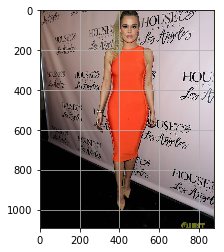

In [6]:
show_cv_image(im)

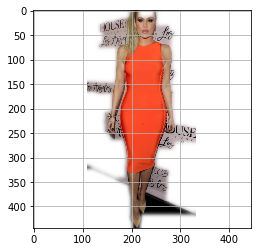

In [7]:
show_cv_image(get_person(im))

In [8]:
from matplotlib.patches import Rectangle

In [9]:
imr, bbs = HogDescriptor(im)

In [10]:
bbs

array([[ 87,  17, 309, 461],
       [ 35, 124, 158, 370],
       [  0, 131,  88, 330],
       [ 16,  48, 125, 265]])

In [11]:
bbs = [[bb[0], bb[1], bb[2] - bb[0], bb[3] - bb[1]]
       for bb in bbs]
bbs

[[87, 17, 222, 444],
 [35, 124, 123, 246],
 [0, 131, 88, 199],
 [16, 48, 109, 217]]

In [12]:
bbs = sorted(bbs, key=lambda x: x[2] * x[3],
             reverse=True)
bbs

[[87, 17, 222, 444],
 [35, 124, 123, 246],
 [16, 48, 109, 217],
 [0, 131, 88, 199]]

In [13]:
bb

NameError: name 'bb' is not defined

In [ ]:
def get_person(img):
    imr, bbs = HogDescriptor(img)
    try:
        bbs = [[bb[0], bb[1], bb[2] - bb[0], bb[3] - bb[1]]
               for bb in bbs]
        bbs = sorted(bbs, key=lambda x: x[2] * x[3],
                     reverse=True)
        bb = bbs[0]
        if max(bb[2], bb[3]) < 200:
            return img
        imc = crop(imr, bb[1], bb[0], bb[3], bb[2])
        masked = get_foreground(imc)
        ims = im_squared(masked)
        return ims
    except:
        return img
